## Presentation 6
**Question 7.7.5:** Repeat Problem 4 for Gauss-Seidel.

**Question 7.7.4:** Write a computer code that does Jacobi for the previous example, for a specified
number of iterations. How many iterations does it take to get convergence, in
the sense the consecutive iterates differ by less than $10^{-6}$?

\begin{equation}
A =
\begin{bmatrix}
4 & -1 & 0 & -1\\
-1 & 4 & -1 & 0\\
0 & -1 & 4 & -1\\
-1 & 0 & -1 & 4
\end{bmatrix}
\end{equation}

and $b = \left[-4,2,4,10\right]^T$.  The correct answer is $x = \left[0, 1, 2, 3\right]^T$.

In [38]:
import numpy
def gauss_seidel(A_, b_, tolerance):
    A = A_.copy()
    b = b_.copy()
    phi = numpy.zeros(b_.shape[0])
    iterations = 0
    Error = numpy.array([])
    while True:
        iterations += 1
        tempx = phi.copy()
        for i in range(0, A.shape[0]):
            sigma = 0
            for j in range(0, A.shape[0]):
                if i != j:
                    sigma = sigma + A[i, j]*phi[j]
            phi[i] = ((1.0)*(b[i] - sigma)/A[i, i])
        print(f"Iteration {iterations}: {phi}\n")
        tol = max(abs(phi - tempx))
        Error = numpy.append(Error, tol)
        if(tol <= tolerance):
            break
        if(iterations >= 100):
            break
    return phi, iterations

In [39]:
def jacobi_method(x_0, A, b, tolerance):
    x0 = x_0.copy()
    x = numpy.zeros(b.shape[0])
    iterations = 0
    while True:
        iterations += 1
        for i in range(0, A.shape[0]):
            sigma = 0
            for j in range(0, A.shape[0]):
                if i != j:
                    sigma = sigma + A[i, j]*x0[j]
            x[i] = (1.0)*(b[i]-sigma)/A[i, i]
        print(f"Iteration {iterations}: {x}\n")
        tol = max(abs(x - x0))
        if(tol <= tolerance):
            break
        else:
            x0 = x.copy()
        if(iterations >= 100):
            break
    return x, iterations

In [31]:
numpy.set_printoptions(formatter={'float': '{: 0.8f}'.format})
A = numpy.array([[4, -1, 0, -1],
                 [-1, 4, -1, 0],
                 [0, -1, 4, -1],
                 [-1, 0, -1, 4]])
b = numpy.array([-4, 2, 4, 10])
x_0 = numpy.array([0.0, 0.0, 0.0, 0.0])
tol = numpy.array([.01,.001,.0001,.00001,.000001,.0000001,.00000001,.000000001,.0000000001])
print(A)
print(b)
iters = numpy.array([])
iters1 = numpy.array([])
for t in tol:
    x_, iterations = gauss_seidel(A, b, t)
    x, iterations1 = jacobi_method(x_0, A, b, t)
    iters = numpy.append(iters, iterations)
    iters1 = numpy.append(iters1, iterations1)
    

[[ 4 -1  0 -1]
 [-1  4 -1  0]
 [ 0 -1  4 -1]
 [-1  0 -1  4]]
[-4  2  4 10]
Iteration 1: [-1.00000000  0.25000000  1.06250000  2.51562500]

Iteration 2: [-0.30859375  0.68847656  1.80102539  2.87310791]

Iteration 3: [-0.10960388  0.92285538  1.94899082  2.95984674]

Iteration 4: [-0.02932447  0.97991659  1.98494083  2.98890409]

Iteration 5: [-0.00779483  0.99428650  1.99579765  2.99700070]

Iteration 6: [-0.00217820  0.99840486  1.99885139  2.99916830]

Iteration 1: [-1.00000000  0.50000000  1.00000000  2.50000000]

Iteration 2: [-0.25000000  0.50000000  1.75000000  2.50000000]

Iteration 3: [-0.25000000  0.87500000  1.75000000  2.87500000]

Iteration 4: [-0.06250000  0.87500000  1.93750000  2.87500000]

Iteration 5: [-0.06250000  0.96875000  1.93750000  2.96875000]

Iteration 6: [-0.01562500  0.96875000  1.98437500  2.96875000]

Iteration 7: [-0.01562500  0.99218750  1.98437500  2.99218750]

Iteration 8: [-0.00390625  0.99218750  1.99609375  2.99218750]

Iteration 9: [-0.00390625  0.

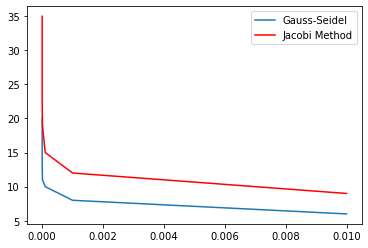

In [32]:
import matplotlib.pyplot as plt
plt.plot(tol, iters, label='Gauss-Seidel')
plt.plot(tol, iters1, label='Jacobi Method', color="r")
plt.legend()
plt.show()

In [33]:
iters

array([ 6.00000000,  8.00000000,  10.00000000,  11.00000000,  13.00000000,
        15.00000000,  17.00000000,  19.00000000,  20.00000000])

In [34]:
iters1

array([ 9.00000000,  12.00000000,  15.00000000,  19.00000000,
        22.00000000,  25.00000000,  29.00000000,  32.00000000,
        35.00000000])

In [35]:
tol

array([ 0.01000000,  0.00100000,  0.00010000,  0.00001000,  0.00000100,
        0.00000010,  0.00000001,  0.00000000,  0.00000000])

In [37]:
A = numpy.array([[4, 1, 0, 0],
              [1, 5, 1, 0],
              [0, 1, 6, 1],
             [1, 0, 1, 4]])
b = numpy.array([1, 7, 16, 14])
x = numpy.array([0, 0, 0, 0])
print(gauss_seidel(A, b, .000000001))

Iteration 1: [ 0.25000000  1.35000000  2.44166667  2.82708333]

Iteration 2: [-0.08750000  0.92916667  2.04062500  3.01171875]

Iteration 3: [ 0.01770833  0.98833333  1.99999132  2.99557509]

Iteration 4: [ 0.00291667  0.99941840  2.00083442  2.99906223]

Iteration 5: [ 0.00014540  0.99980404  2.00018896  2.99991641]

Iteration 6: [ 0.00004899  0.99995241  2.00002186  2.99998229]

Iteration 7: [ 0.00001190  0.99999325  2.00000408  2.99999601]

Iteration 8: [ 0.00000169  0.99999885  2.00000086  2.99999936]

Iteration 9: [ 0.00000029  0.99999977  2.00000014  2.99999989]

Iteration 10: [ 0.00000006  0.99999996  2.00000002  2.99999998]

Iteration 11: [ 0.00000001  0.99999999  2.00000000  3.00000000]

Iteration 12: [ 0.00000000  1.00000000  2.00000000  3.00000000]

Iteration 13: [ 0.00000000  1.00000000  2.00000000  3.00000000]

Iteration 14: [ 0.00000000  1.00000000  2.00000000  3.00000000]

(array([ 0.00000000,  1.00000000,  2.00000000,  3.00000000]), 14)
